# **Bussiness Problem**

- Group the similar customers in order to do better marketing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings. simplefilter("ignore")

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
df.rename(columns={"Annual Income (k$)":"Income",
                   "Spending Score (1-100)" :"Score", 'Genre': 'Gender'}, inplace=True)

In [11]:
df

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [13]:
df.isnull().sum()

CustomerID    0
Gender        0
Age           0
Income        0
Score         0
dtype: int64

In [15]:
df.drop(columns=["CustomerID"], inplace=True)

In [17]:
df.drop(columns=["Gender","Age"], inplace=True)      # to show initial scatter plot & also final scatter plot to students

In [19]:
X = df

#y= nothing (unlabedlled data)

In [21]:
X

,Income,Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


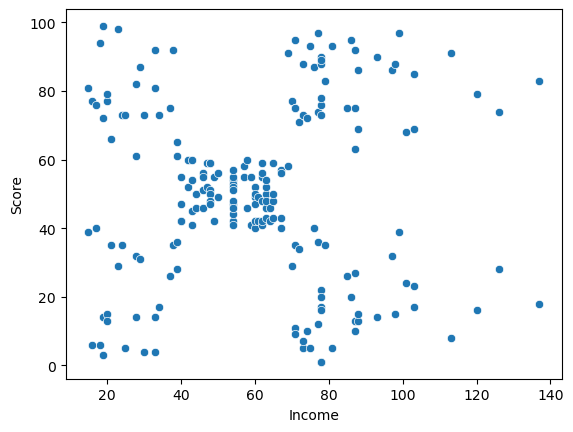

In [25]:
sns.scatterplot(x='Income',y="Score",data=df)
plt.show()

# **1. K-Means CLustering**

- find the optimal number of clusters : Elbow Curve

[269981.28, 183811.2827701642, 106348.37306211122, 82472.19413919412, 44448.4554479337, 38797.9027638142, 31609.777049984892, 26487.333159783764, 23283.29266059144, 20333.542305882525]


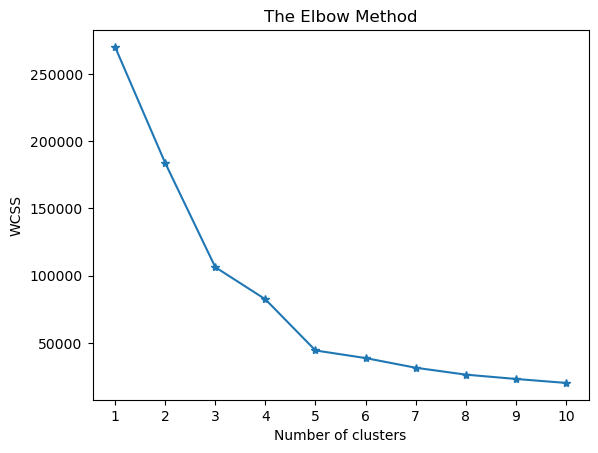

In [30]:
wcss = []

for k in range(1,11):
    from sklearn. cluster import KMeans
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    kmeans. fit(X)
    wcss.append(kmeans.inertia_)

print(wcss)

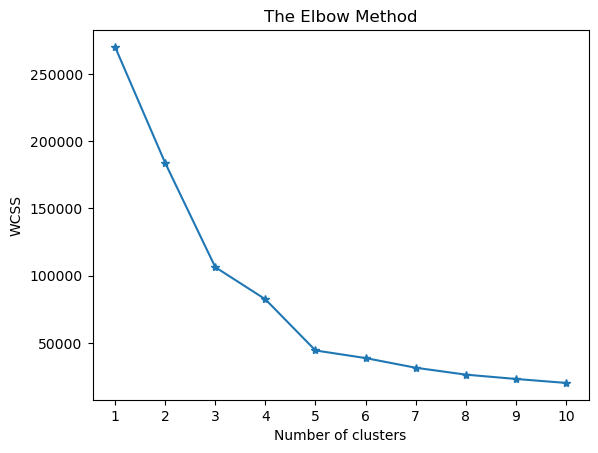

In [32]:
# Using the elbow method
plt.plot(range(1, 11), wcss, marker="*")
plt.xticks(range(1, 11))
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS' )
plt.show()

**K-Means CLustering Model**

In [35]:
from sklearn. cluster import KMeans

kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = True)

df["km_cluster"]= kmeans. fit_predict(X)

In [37]:
df

,Income,Score,km_cluster
0,15,39,4
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,4
...,...,...,...
195,120,79,3
196,126,28,1
197,126,74,3
198,137,18,1


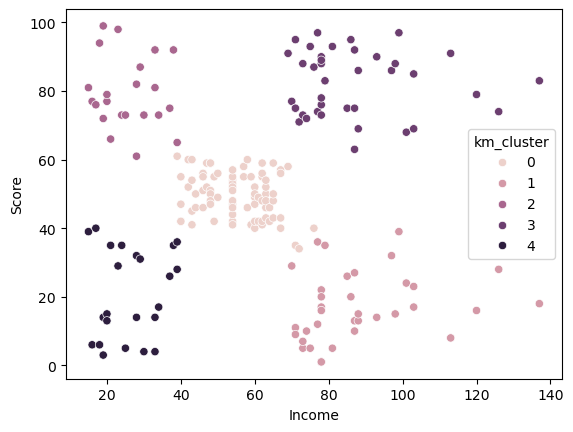

In [41]:
sns.scatterplot(x='Income',y="Score",hue="km_cluster",data=X)
plt.show()

In [45]:
kmeans.predict([[30,80]])

array([2])

In [49]:
kmeans.predict([[130,20]])

array([1])

In [51]:
kmeans.predict([[1300,20]])

array([1])

**Clustering - Observation**

- Cluster 0 : Average Income, Average Spending Score - Can target these set of customers by providing them with Low cost EMI's etc.
- Cluster 1 : High Income, Low Spending Score - Target these customers by asking the feedback and advertising the product in a better way
- Cluster 2 : Low Income, High Spending Score - May or may not target these group of customers based on the policy of the mall.
- Cluster 3 : High Income, High Spending Score - Target these customers by sending new product alerts which would lead to increase in the
revenue collected bv the mall as they are loyal customers.
- Cluster 4 : Low Income, Low Spending Score - Don't target these customers since they have less income and need to save money.

# **2. Hierarchical Clustering**

- identifying the optimal number of clusters using Dendrogram

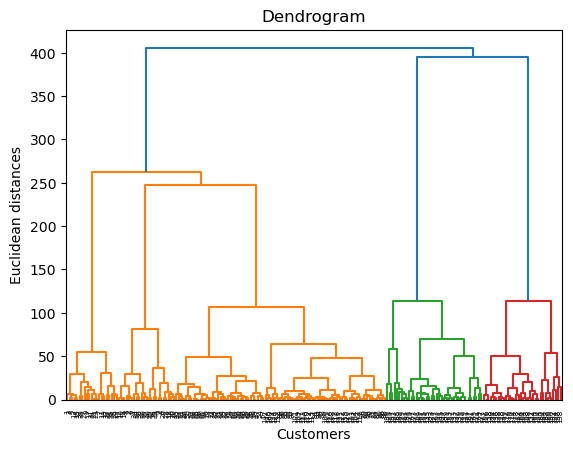

In [76]:
import scipy. cluster.hierarchy as sch

data = sch.linkage(X, method = 'ward')

dendrogram = sch.dendrogram(data)

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

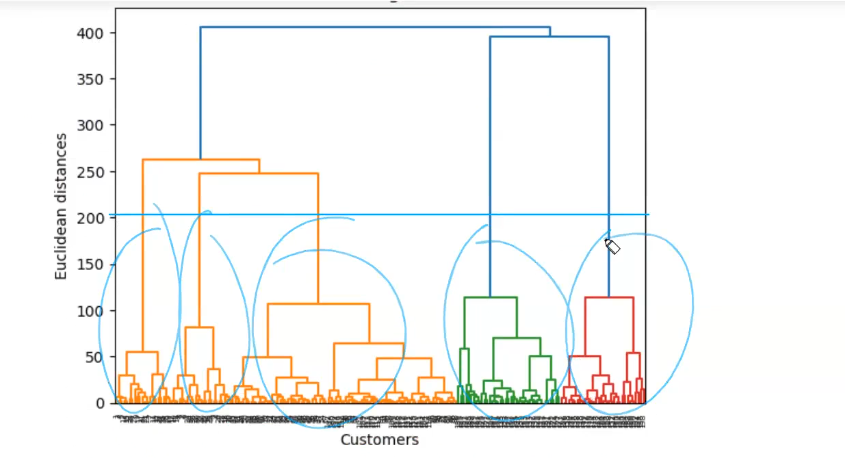

**Hierarchical Clustering Model**

In [86]:
from sklearn.cluster import AgglomerativeClustering

# Using 'metric' instead of 'affinity'
hc = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')

# Fit and predict, assigning cluster labels to a new column in X
X["h_cluster"] = hc.fit_predict(X)

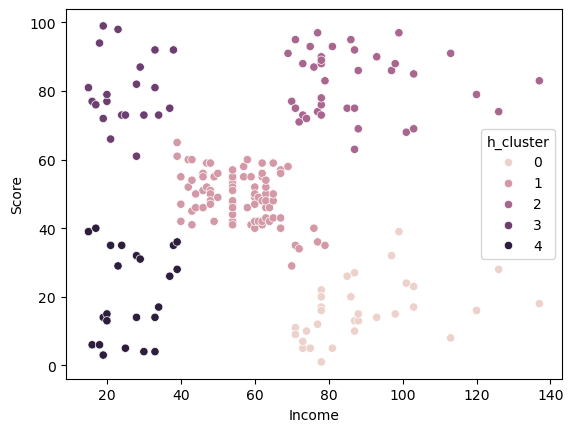

In [88]:
sns.scatterplot(x='Income',y="Score", hue="h_cluster",data=X)
plt.show()

# **3. DBSCAN**

In [58]:
from sklearn. cluster import DBSCAN

for r in range(1,11):
    for m in range(3,10):
        dbs = DBSCAN(eps=r, min_samples=m)
        X["db_cluster"] = dbs.fit_predict(X)

    if X["db_cluster"].nunique() == 5:
        break

print("eps:",r)
print("min:",m)

eps: 8
min: 9


In [70]:
from sklearn.cluster import DBSCAN

dbs = DBSCAN(eps=8, min_samples=9)

X["db_cluster"] = dbs.fit_predict(X)

X["db_cluster"].nunique()

5

In [72]:
X["db_cluster"].unique()

array([-1,  0,  3,  1,  2], dtype=int64)

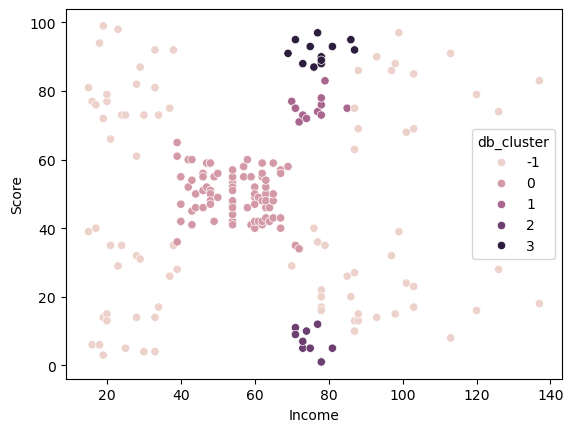

In [74]:
sns.scatterplot(x='Income',y="Score",hue="db_cluster",data=X)
plt.show()